In [194]:
import iris
import iris.plot as iplt
import iris.quickplot as qplt
import iris.pandas as ip
import matplotlib.pyplot as plt
import datetime
import pandas as pd
import numpy as np

%matplotlib inline

In [46]:
# import cdsapi

# c = cdsapi.Client()

# c.retrieve(
#     'reanalysis-era5-land',
#     {
#         'variable':[
#             '2m_temperature','total_precipitation'
#         ],
#         'year':'2017',
#         'month':[
#             '09','10'
#         ],
#         'day':[
#             '01','02','03',
#             '04','05','06',
#             '07','08','09',
#             '10','11','12',
#             '13','14','15',
#             '16','17','18',
#             '19','20','21',
#             '22','23','24',
#             '25','26','27',
#             '28','29','30',
#             '31'
#         ],
#         'time':[
#             '00:00','01:00','02:00',
#             '03:00','04:00','05:00',
#             '06:00','07:00','08:00',
#             '09:00','10:00','11:00',
#             '12:00','13:00','14:00',
#             '15:00','16:00','17:00',
#             '18:00','19:00','20:00',
#             '21:00','22:00','23:00'
#         ],
#         "area": "45/-73/45/-73",    # North America study region
#         "grid": "1.0/1.0",  # 1.0 longitude by 1.0 latitude
#         'format':'netcdf'
#     },
#     'mtl_temperature.nc')

2019-08-13 13:49:23,090 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-land
2019-08-13 13:49:23,674 INFO Request is queued
2019-08-13 13:49:24,821 INFO Request is running
2019-08-13 14:03:41,987 INFO Request is completed
2019-08-13 14:03:41,989 INFO Downloading http://136.156.132.105/cache-compute-0000/cache/data0/adaptor.mars.internal-1565700563.7691536-9525-7-e02f038f-627f-41f5-8b6d-787a43d87389.nc to mtl_temperature.nc (12.7K)
2019-08-13 14:03:42,015 INFO Download rate 511.3K/s


Result(content_length=13012,content_type=application/x-netcdf,location=http://136.156.132.105/cache-compute-0000/cache/data0/adaptor.mars.internal-1565700563.7691536-9525-7-e02f038f-627f-41f5-8b6d-787a43d87389.nc)

In [47]:
filename = 'mtl_temperature.nc'
cubes = iris.load(filename)
print(cubes)
mtl_prec = cubes[0]
mtl_temp = cubes[1]

0: Total precipitation / (m)           (time: 1464; latitude: 1; longitude: 1)
1: 2 metre temperature / (K)           (time: 1464; latitude: 1; longitude: 1)


In [48]:
mtl_temp.coords()

[DimCoord(array([1031448, 1031449, 1031450, ..., 1032909, 1032910, 1032911],
       dtype=int32), standard_name='time', units=Unit('hours since 1900-01-01 00:00:00.0', calendar='gregorian'), long_name='time', var_name='time'),
 DimCoord(array([45.], dtype=float32), standard_name='latitude', units=Unit('degrees'), long_name='latitude', var_name='latitude'),
 DimCoord(array([-73.], dtype=float32), standard_name='longitude', units=Unit('degrees'), long_name='longitude', var_name='longitude')]

In [109]:
print("first timestamp", datetime.date(1900,1,1) + datetime.timedelta(hours=1031448))
print("last timestamp", datetime.date(1900,1,1) + datetime.timedelta(hours=1032911))

first timestamp 2017-09-01
last timestamp 2017-10-17


In [110]:
## subset by dates of study
mtl_temp = mtl_temp[408:1128]
mtl_prec = mtl_prec[408:1128]

In [111]:
# convert from K to C.
if mtl_temp.data[0][0][0] > 100:
    mtl_temp.data = mtl_temp.data - 273.15
else:
    print("no problem")

no problem


In [172]:
mtl_temp.data[0][0][:]

masked_array(data=[21.65590468],
             mask=False,
       fill_value=1e+20)

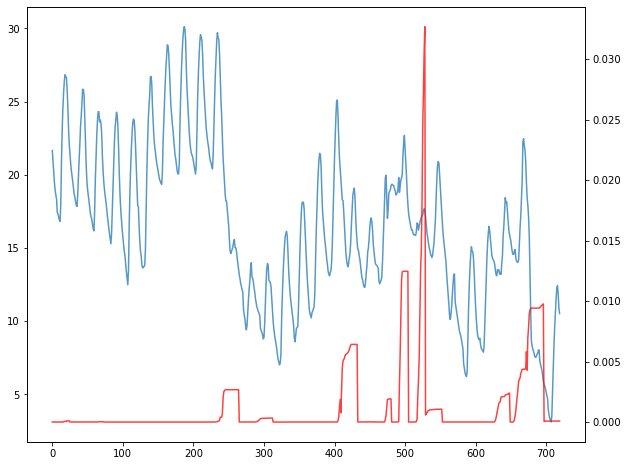

In [173]:
fig, ax = plt.subplots(1, figsize=(10,8))
ax.plot([i[0][0] for i in mtl_temp.data.data], alpha=.75)
ax2 = ax.twinx()
ax2.plot([i[0][0] for i in mtl_prec.data.data], color='red', alpha=.75)

In [175]:
first_time_hours = int(mtl_temp.coords()[0][0].points[0])
last_time_hours = int(mtl_temp.coords()[0][-1].points[0])
last_time_point = datetime.datetime(1900,1,1,0) + datetime.timedelta(hours=last_time_hours)
total_hours = len(mtl_temp.coords()[0].points)

In [176]:
datetime.timedelta(hours=last_time_hours)

datetime.timedelta(days=43023, seconds=82800)

In [177]:
total_hours

720

In [178]:
date_list = [last_time_point - datetime.timedelta(hours=x) for x in range(total_hours)]
date_list.reverse()

In [193]:
np.array(precs)

NameError: name 'np' is not defined

In [209]:
precs = [i[0][0] for i in mtl_prec.data.data]
temps = [i[0][0] for i in mtl_temp.data.data]
df_dict = {"precipitation" : precs, "temperature" : temps}
df = pd.DataFrame.from_dict(df_dict)


In [213]:
df['dt'] = date_list

In [217]:
# df.to_csv("../data/mtl_temp_prec.csv", index=False)